In [1]:
import pandas,numpy,seaborn
import scipy,scipy.stats
import sklearn,sklearn.decomposition
import matplotlib,matplotlib.pyplot

matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14,'axes.labelsize':18})
matplotlib.rcParams['pdf.fonttype']=42

In [2]:
def histogrammer(x):

    # get number of bins based on Rice's rule
    rice=int((len(x)**(1/3))*2)
    print('\t number of bins according to Rice: {}'.format(rice))

    counts,edges=numpy.histogram(x,bins=rice)
    half=(edges[1]-edges[0])/2
    centers=edges[:-1]+half

    return centers,counts

# 1. User defined variables

In [3]:
proteomics_file='/Volumes/omics4tb2/alomana/projects/uwm/data/Fo-normalized-MS-073119.txt'
results_dir='/Volumes/omics4tb2/alomana/projects/uwm/results/proteomics/'

# 2. Read data

In [4]:
df=pandas.read_csv(proteomics_file,skiprows=2,usecols=[4,9,10,11],sep='\t',thousands=',',index_col=0)
print(df.shape)
df.head()

(1864, 3)


,HMDM,THP-1,iMAC
Accession Number,,,
ACTG_HUMAN,3628.7,4179.1,2884.8
VIME_HUMAN,3068.2,1475.1,1790.4
EF1A1_HUMAN,1474.7,1983.9,1165.6
KPYM_HUMAN,1475.9,1312.1,1284.9
G3P_HUMAN,1822.7,1164.2,1632.0


In [5]:
df.dropna(axis=0,inplace=True,how='all')
df.shape

(1862, 3)

In [6]:
humanIDs=df.index.tolist()
newIDs=[element.split('_HUMAN')[0] for element in humanIDs]
df.index=newIDs

In [7]:
df.sort_index().head(10)

,HMDM,THP-1,iMAC
1433B,95.712,100.040,112.350
1433E,82.877,68.042,109.080
1433F,40.934,34.060,57.057
1433G,98.871,82.174,124.520
1433T,62.244,66.018,81.286
1433Z,183.900,135.380,209.610
1A02,0.000,40.300,0.000
1A03,178.630,20.875,49.627
1A24,170.820,0.000,0.000
1A34,163.220,25.205,75.536


In [8]:
df.sort_index().tail(10)

,HMDM,THP-1,iMAC
XPP1,3.5805,1.7166,14.2570
XRCC5,28.6160,147.1100,36.5520
XRCC6,31.8570,116.6800,26.6280
XRN2,0.0000,8.5245,3.4542
YBOX1,62.8380,76.3030,50.9200
ZCCHV,0.0000,3.4443,0.0000
ZFR,0.0000,2.5805,0.0000
ZFY16,3.1934,0.0000,0.0000
ZN326,0.0000,2.6288,0.0000
ZYX,36.4820,127.7300,44.1590


In [9]:
df.rename_axis('Gene ID',inplace=True)
print(df.shape)
df.head()

(1862, 3)


,HMDM,THP-1,iMAC
Gene ID,,,
ACTG,3628.7,4179.1,2884.8
VIME,3068.2,1475.1,1790.4
EF1A1,1474.7,1983.9,1165.6
KPYM,1475.9,1312.1,1284.9
G3P,1822.7,1164.2,1632.0


# 3. Variable exploration

In [10]:
df['Mean']=df.loc[:,['HMDM','THP-1','iMAC']].mean(axis=1)
df['log2Mean']=numpy.log2(df['Mean'])
df['STD']=df.loc[:,['HMDM','THP-1','iMAC']].std(axis=1)
df['CV']=df['STD']/df['Mean']
df.head()

,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV
Gene ID,,,,,,,
ACTG,3628.7,4179.1,2884.8,3564.200000,11.799363,649.556241,0.182245
VIME,3068.2,1475.1,1790.4,2111.233333,11.043870,843.618648,0.399586
EF1A1,1474.7,1983.9,1165.6,1541.400000,10.590026,413.207442,0.268073
KPYM,1475.9,1312.1,1284.9,1357.633333,10.406878,103.320924,0.076104
G3P,1822.7,1164.2,1632.0,1539.633333,10.588371,338.827778,0.220070


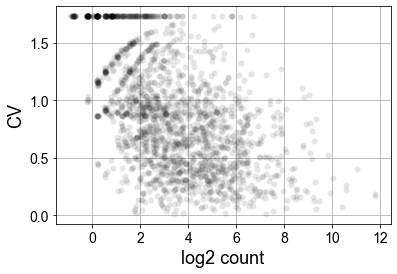

In [11]:
matplotlib.pyplot.plot(df['log2Mean'],df['CV'],'ok',alpha=0.1,mew=0)
matplotlib.pyplot.xlabel('log2 count')
matplotlib.pyplot.ylabel('CV')
matplotlib.pyplot.grid()

# 4. Visualization

In [12]:
df['HMDM_zscore']=(df['HMDM']-df['Mean'])/df['STD']
df['THP-1_zscore']=(df['THP-1']-df['Mean'])/df['STD']
df['iMAC_zscore']=(df['iMAC']-df['Mean'])/df['STD']
df.head()

,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV,HMDM_zscore,THP-1_zscore,iMAC_zscore
Gene ID,,,,,,,,,,
ACTG,3628.7,4179.1,2884.8,3564.200000,11.799363,649.556241,0.182245,0.099299,0.946646,-1.045945
VIME,3068.2,1475.1,1790.4,2111.233333,11.043870,843.618648,0.399586,1.134359,-0.754053,-0.380306
EF1A1,1474.7,1983.9,1165.6,1541.400000,10.590026,413.207442,0.268073,-0.161420,1.070891,-0.909471
KPYM,1475.9,1312.1,1284.9,1357.633333,10.406878,103.320924,0.076104,1.144654,-0.440698,-0.703956
G3P,1822.7,1164.2,1632.0,1539.633333,10.588371,338.827778,0.220070,0.835429,-1.108036,0.272607


In [13]:
pca=sklearn.decomposition.PCA(n_components=2)
principalComponents=pca.fit_transform(df.loc[:,['HMDM_zscore','THP-1_zscore','iMAC_zscore']].T)
principalDf=pandas.DataFrame(data=principalComponents,columns=['PC1','PC2'])
principalDf.head()

,PC1,PC2
0,-15.573803,28.889846
1,38.314615,-3.391242
2,-22.740811,-25.498603


In [14]:
explained=pca.explained_variance_ratio_
print(explained)

[0.5982002 0.4017998]


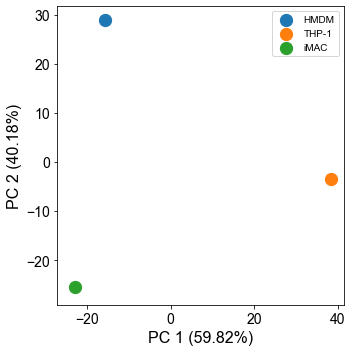

In [15]:
fig = matplotlib.pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 ({:.2f}%)'.format(explained[0]*100),fontsize=16)
ax.set_ylabel('PC 2 ({:.2f}%)'.format(explained[1]*100),fontsize=16)
labels=['HMDM','THP-1','iMAC']
for i in range(3):
    ax.scatter(principalDf['PC1'][i],principalDf['PC2'][i],s=150,label=labels[i])
matplotlib.pyplot.legend()
matplotlib.pyplot.tight_layout()

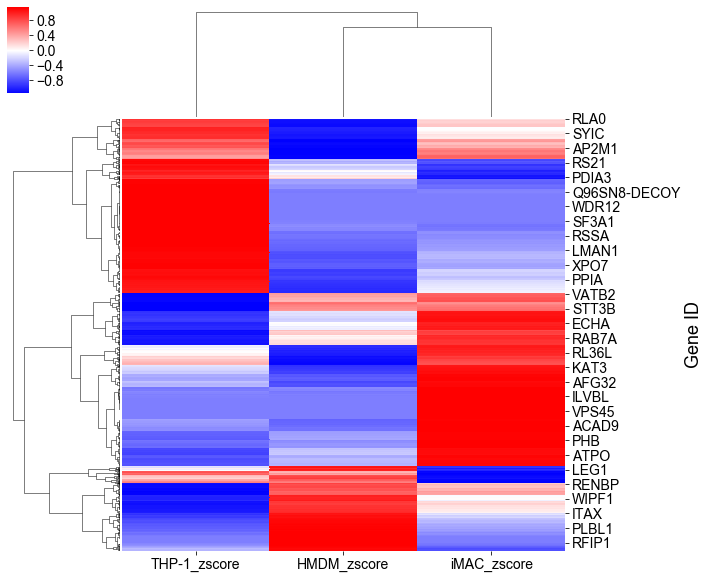

In [16]:
g=seaborn.clustermap(df.loc[:,['HMDM_zscore','THP-1_zscore','iMAC_zscore']],cmap='bwr')

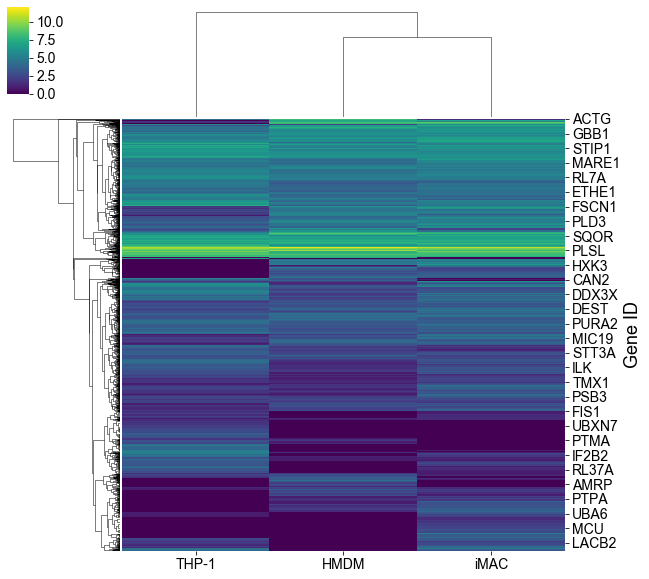

In [17]:
g=seaborn.clustermap(numpy.log2(df.loc[:,['HMDM','THP-1','iMAC']]+1),cmap='viridis')

# most variable proteins

,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV,HMDM_zscore,THP-1_zscore,iMAC_zscore
Gene ID,,,,,,,,,,
UPAR,0.000,35.838,0.000,11.946000,3.578456,20.691079,1.732051,-0.577350,1.154701,-0.577350
1A02,0.000,40.300,0.000,13.433333,3.747745,23.267216,1.732051,-0.577350,1.154701,-0.577350
PPIH,0.000,39.811,0.000,13.270333,3.730133,22.984892,1.732051,-0.577350,1.154701,-0.577350
DRB3,163.220,0.000,0.000,54.406667,5.765712,94.235111,1.732051,1.154701,-0.577350,-0.577350
1A24,170.820,0.000,0.000,56.940000,5.831371,98.622973,1.732051,1.154701,-0.577350,-0.577350
DPP4,0.000,0.000,34.925,11.641667,3.541226,20.163958,1.732051,-0.577350,-0.577350,1.154701
DMB,56.128,0.000,0.000,18.709333,4.225686,32.405516,1.732051,1.154701,-0.577350,-0.577350
2B18,171.990,0.000,0.000,57.330000,5.841218,99.298473,1.732051,1.154701,-0.577350,-0.577350
2B1B,128.970,0.000,0.000,42.990000,5.425929,74.460864,1.732051,1.154701,-0.577350,-0.577350


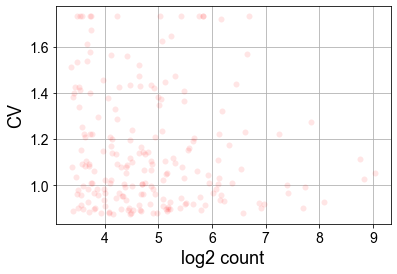

In [18]:
mv=df.loc[(df['log2Mean'] > df['log2Mean'].mean()) & (df['CV'] > df['CV'].mean())]

matplotlib.pyplot.plot(mv['log2Mean'],mv['CV'],'or',alpha=0.1,mew=0)
matplotlib.pyplot.xlabel('log2 count')
matplotlib.pyplot.ylabel('CV')
matplotlib.pyplot.grid()

mv.sort_values(by=['CV'],ascending=False).head(10)

In [19]:
pca=sklearn.decomposition.PCA(n_components=2)
principalComponents=pca.fit_transform(mv.loc[:,['HMDM_zscore','THP-1_zscore','iMAC_zscore']].T)
principalDf=pandas.DataFrame(data=principalComponents,columns=['PC1','PC2'])
principalDf.head()

,PC1,PC2
0,-4.446396,9.470209
1,13.009080,-1.807090
2,-8.562684,-7.663120


In [20]:
explained=pca.explained_variance_ratio_
print(explained)

[0.63363806 0.36636194]


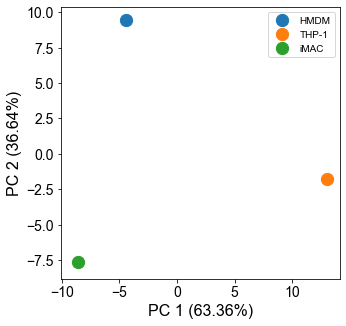

In [21]:
fig = matplotlib.pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 ({:.2f}%)'.format(explained[0]*100),fontsize=16)
ax.set_ylabel('PC 2 ({:.2f}%)'.format(explained[1]*100),fontsize=16)
labels=['HMDM','THP-1','iMAC']
for i in range(3):
    ax.scatter(principalDf['PC1'][i],principalDf['PC2'][i],s=150,label=labels[i])
matplotlib.pyplot.legend()

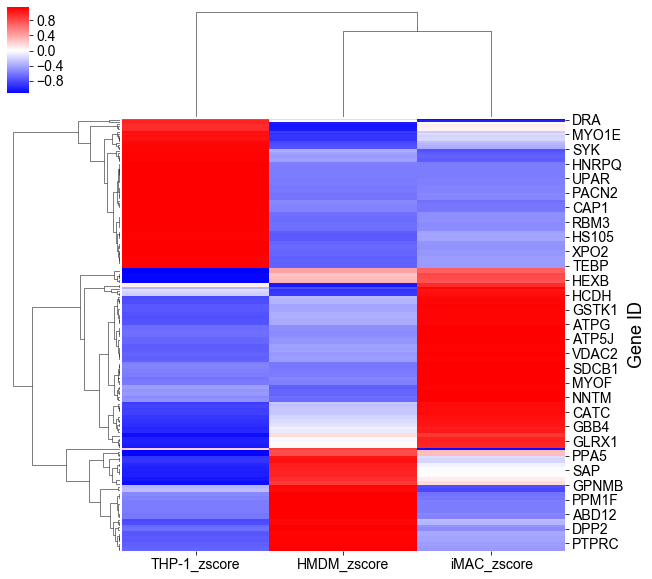

In [22]:
g=seaborn.clustermap(mv.loc[:,['HMDM_zscore','THP-1_zscore','iMAC_zscore']],cmap='bwr')

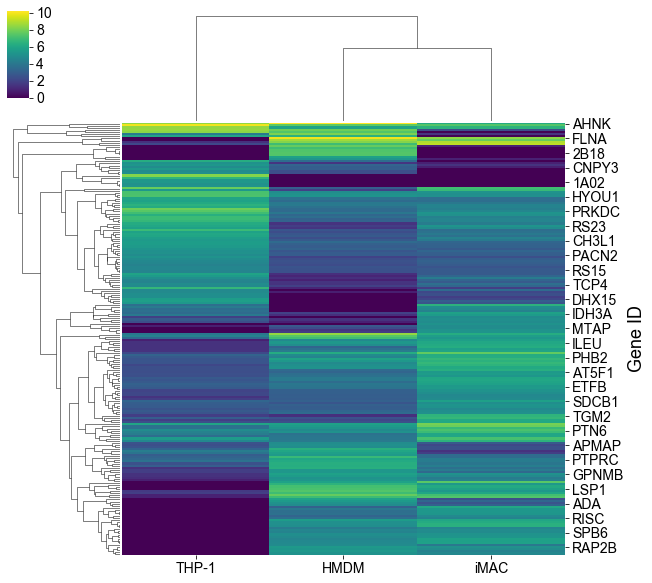

In [23]:
g=seaborn.clustermap(numpy.log2(mv.loc[:,['HMDM','THP-1','iMAC']]+1),cmap='viridis')

# 5. Quantification

## 5.1. Correlation

Text(0.5, 0, 'log2 count')

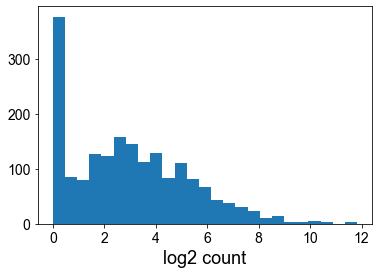

In [24]:
numpy.log2(df['HMDM']+1).hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 count')

Text(0.5, 0, 'log2 count')

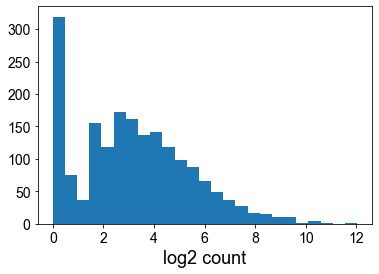

In [25]:
numpy.log2(df['THP-1']+1).hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 count')

Text(0.5, 0, 'log2 count')

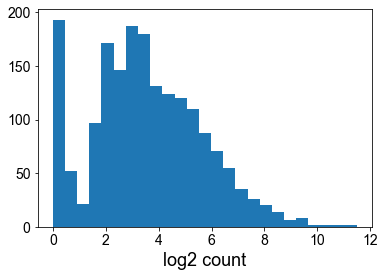

In [26]:
numpy.log2(df['iMAC']+1).hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 count')

,HMDM,THP-1,iMAC
HMDM,1.000000,0.882133,0.917650
THP-1,0.882133,1.000000,0.900638
iMAC,0.917650,0.900638,1.000000


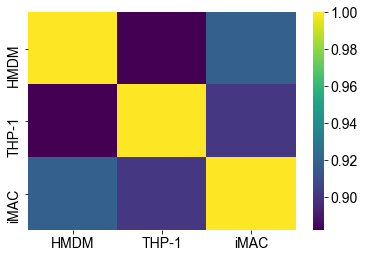

In [27]:
pearson=df.corr(method='pearson').iloc[:3,:3]
seaborn.heatmap(pearson,cmap='viridis')
pearson

,HMDM,THP-1,iMAC
HMDM,1.000000,0.366629,0.577964
THP-1,0.366629,1.000000,0.352209
iMAC,0.577964,0.352209,1.000000


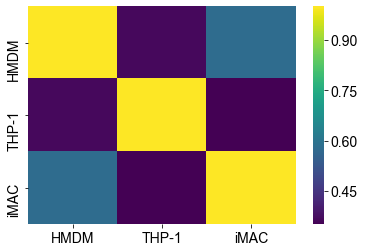

In [28]:
kendall=df.corr(method='kendall').iloc[:3,:3]
seaborn.heatmap(kendall,cmap='viridis')
kendall

,HMDM,THP-1,iMAC
HMDM,1.000000,0.501479,0.740133
THP-1,0.501479,1.000000,0.492295
iMAC,0.740133,0.492295,1.000000


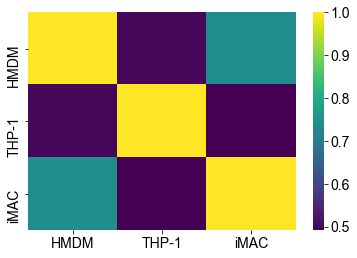

In [29]:
spearman=df.corr(method='spearman').iloc[:3,:3]
seaborn.heatmap(spearman,cmap='viridis')
spearman

# 5.2. Histogram of fold-change

In [30]:
df['log2FC THP']=numpy.log2((df['THP-1']+1)/(df['HMDM']+1))
df['log2FC iMAC']=numpy.log2((df['iMAC']+1)/(df['HMDM']+1))
df.head()

,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV,HMDM_zscore,THP-1_zscore,iMAC_zscore,log2FC THP,log2FC iMAC
Gene ID,,,,,,,,,,,,
ACTG,3628.7,4179.1,2884.8,3564.200000,11.799363,649.556241,0.182245,0.099299,0.946646,-1.045945,0.203687,-0.330879
VIME,3068.2,1475.1,1790.4,2111.233333,11.043870,843.618648,0.399586,1.134359,-0.754053,-0.380306,-1.056072,-0.776775
EF1A1,1474.7,1983.9,1165.6,1541.400000,10.590026,413.207442,0.268073,-0.161420,1.070891,-0.909471,0.427667,-0.339089
KPYM,1475.9,1312.1,1284.9,1357.633333,10.406878,103.320924,0.076104,1.144654,-0.440698,-0.703956,-0.169595,-0.199794
G3P,1822.7,1164.2,1632.0,1539.633333,10.588371,338.827778,0.220070,0.835429,-1.108036,0.272607,-0.646291,-0.159344


In [31]:
he=df[df['log2Mean'] > numpy.log2(10)]
he.shape

(866, 12)

Text(0.5, 0, 'log2 FC')

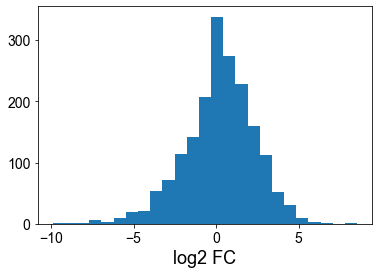

In [32]:
df['log2FC THP'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 FC')

Text(0.5, 0, 'log2 FC')

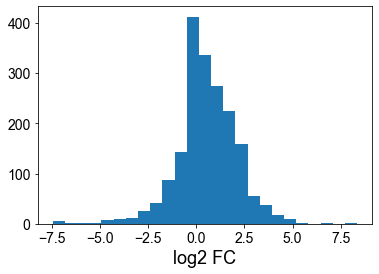

In [33]:
df['log2FC iMAC'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 FC')

	 number of bins according to Rice: 24
	 number of bins according to Rice: 24


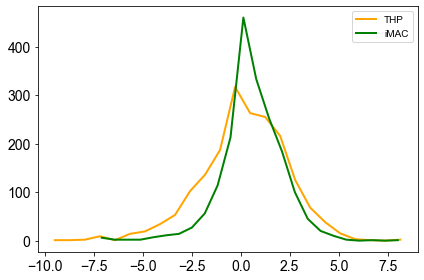

In [34]:
centersA,counts=histogrammer(df['log2FC THP'].tolist())
matplotlib.pyplot.plot(centersA,counts,'-',color='orange',lw=2,label='THP')

centersB,counts=histogrammer(df['log2FC iMAC'].tolist())
matplotlib.pyplot.plot(centersB,counts,'-',color='green',lw=2,label='iMAC')

matplotlib.pyplot.legend()
matplotlib.pyplot.tight_layout()

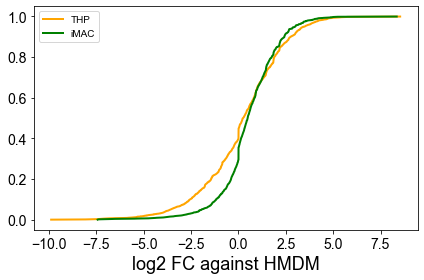

In [35]:
# kolmogorov test of fold change
x=numpy.sort(df['log2FC THP'].tolist())
y=numpy.arange(x.shape[0])/x.shape[0]
matplotlib.pyplot.plot(x,y,'-',color='orange',lw=2,label='THP')

x=numpy.sort(df['log2FC iMAC'].tolist())
y=numpy.arange(x.shape[0])/x.shape[0]
matplotlib.pyplot.plot(x,y,'-',color='green',lw=2,label='iMAC')

matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.tight_layout()

In [36]:
scipy.stats.ks_2samp(df['log2FC THP'].tolist(),df['log2FC iMAC'].tolist())

Ks_2sampResult(statistic=0.14930182599355532, pvalue=1.3455592889562505e-18)

# 5.3. Dot plot

In [37]:
df.head()

,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV,HMDM_zscore,THP-1_zscore,iMAC_zscore,log2FC THP,log2FC iMAC
Gene ID,,,,,,,,,,,,
ACTG,3628.7,4179.1,2884.8,3564.200000,11.799363,649.556241,0.182245,0.099299,0.946646,-1.045945,0.203687,-0.330879
VIME,3068.2,1475.1,1790.4,2111.233333,11.043870,843.618648,0.399586,1.134359,-0.754053,-0.380306,-1.056072,-0.776775
EF1A1,1474.7,1983.9,1165.6,1541.400000,10.590026,413.207442,0.268073,-0.161420,1.070891,-0.909471,0.427667,-0.339089
KPYM,1475.9,1312.1,1284.9,1357.633333,10.406878,103.320924,0.076104,1.144654,-0.440698,-0.703956,-0.169595,-0.199794
G3P,1822.7,1164.2,1632.0,1539.633333,10.588371,338.827778,0.220070,0.835429,-1.108036,0.272607,-0.646291,-0.159344


THP up: (246, 12)
THP down: (233, 12)
iMAC up: (230, 12)
iMAC down: (91, 12)


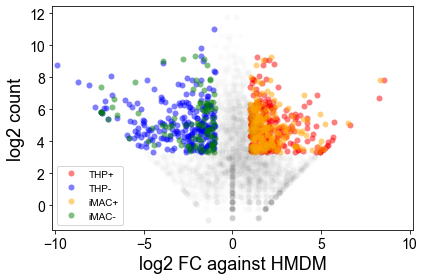

In [38]:
new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC THP'] > 1)]
matplotlib.pyplot.plot(new['log2FC THP'],new['log2Mean'],'o',color='red',label='THP+',alpha=0.5,mew=0)
print('THP up: {}'.format(new.shape))

new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC THP'] < -1)]
matplotlib.pyplot.plot(new['log2FC THP'],new['log2Mean'],'o',color='blue',label='THP-',alpha=0.5,mew=0)
print('THP down: {}'.format(new.shape))

new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC iMAC'] > 1)]
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2Mean'],'o',color='orange',label='iMAC+',alpha=0.5,mew=0)
print('iMAC up: {}'.format(new.shape))

new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC iMAC'] < -1)]
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2Mean'],'o',color='green',label='iMAC-',alpha=0.5,mew=0)
print('iMAC down: {}'.format(new.shape))

new=df.loc[df['log2Mean'] < numpy.log2(10)]
matplotlib.pyplot.plot(new['log2FC THP'],new['log2Mean'],'o',color='black',alpha=0.01,mew=0)
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2Mean'],'o',color='black',alpha=0.01,mew=0)

new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC iMAC'] > -1) & (df['log2FC iMAC'] < 1)]
matplotlib.pyplot.plot(new['log2FC THP'],new['log2Mean'],'o',color='black',alpha=0.01,mew=0)
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2Mean'],'o',color='black',alpha=0.01,mew=0)

matplotlib.pyplot.xlim(-10.2,10.2)
matplotlib.pyplot.legend(loc=3)
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.ylabel('log2 count')
matplotlib.pyplot.tight_layout()

# 5.4. Scatter FC

black 866


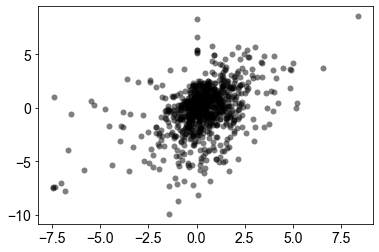

In [39]:
new=df.loc[(df['log2Mean'] > numpy.log2(10))]
theColor='black'
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0)
print(theColor,new.shape[0])

iMAC THP
UP UP maroon 105
DOWN DOWN indigo 53
DOWN UP magenta 11
UP DOWN cyan 42
UP — orange 83
DOWN — green 27
— UP red 130
— DOWN blue 138
— — black 276


/Users/alomana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


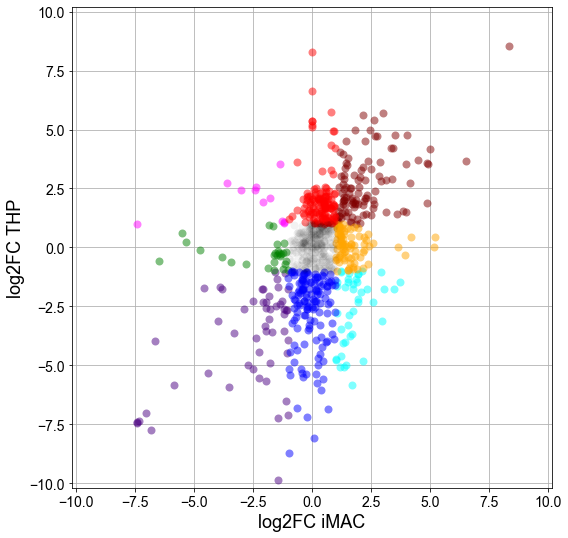

In [40]:
print('iMAC THP')
matplotlib.pyplot.figure(None,(8,8))
the_ms=8

theColor='maroon'
x=new.loc[(df['log2FC iMAC'] > 1) & (df['log2FC THP'] > 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('UP UP',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')

theColor='indigo'
x=new.loc[(df['log2FC iMAC'] < -1) & (df['log2FC THP'] < -1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('DOWN DOWN',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')

theColor='magenta'
x=new.loc[(df['log2FC iMAC'] < -1) & (df['log2FC THP'] > 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('DOWN UP',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')

theColor='cyan'
x=new.loc[(df['log2FC iMAC'] > 1) & (df['log2FC THP'] < -1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('UP DOWN',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')

theColor='orange'
x=new.loc[(df['log2FC iMAC'] > 1) & (df['log2FC THP'] > -1) & (df['log2FC THP'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('UP —',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')

theColor='green'
x=new.loc[(df['log2FC iMAC'] < -1) & (df['log2FC THP'] > -1) & (df['log2FC THP'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('DOWN —',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')

theColor='red'
x=new.loc[(df['log2FC THP'] > 1) & (df['log2FC iMAC'] > -1) & (df['log2FC iMAC'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('— UP',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')

theColor='blue'
x=new.loc[(df['log2FC THP'] < -1) & (df['log2FC iMAC'] > -1) & (df['log2FC iMAC'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('— DOWN',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')

theColor='black'
x=new.loc[(df['log2FC THP'] > -1) & (df['log2FC THP'] < 1) & (df['log2FC iMAC'] > -1) & (df['log2FC iMAC'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.05,mew=0,ms=the_ms)
print('— —',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')

matplotlib.pyplot.xlabel('log2FC iMAC')
matplotlib.pyplot.ylabel('log2FC THP')

matplotlib.pyplot.grid()
matplotlib.pyplot.xlim(-10.2,10.2)
matplotlib.pyplot.ylim([-10.2,10.2])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.axes().set_aspect('equal')